## Importing Libraries

In [394]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

## Data Preprocessing

In [395]:
df = pd.read_csv(r"C:\Users\ashuh\Documents\Untitled Folder\Sleep_health_and_lifestyle_dataset.csv", sep = ',' )

In [396]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [397]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [398]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [399]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [400]:
df['BMI Category'] = df['BMI Category'].replace(['Normal', 'Normal Weight'], 'Normal')

In [401]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [402]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [403]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Gender, Occupation and BMI are the 3 nominal variables

In [404]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [405]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

#### Quality of Sleep and Stress Level are ordinal variables
#### Others are all numerical variables except ID and Sleep Disorder (Target Variable)

In [406]:
#Check unique values
print(df['Sleep Disorder'].unique())

print("\nHere we see that people with No sleep disorders are considered as NaN")

[nan 'Sleep Apnea' 'Insomnia']

Here we see that people with No sleep disorders are considered as NaN


In [407]:
# Fill missing values (NaN) in the 'Sleep Disorder' column with 'No Sleep Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')

# Display the unique values in the 'Sleep Disorder' column after filling NaN values
print(df['Sleep Disorder'].unique())

print("\nWe have changed NaN to No Sleep Disorder")

['No Sleep Disorder' 'Sleep Apnea' 'Insomnia']

We have changed NaN to No Sleep Disorder


In [408]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep Disorder
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep Disorder
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep Disorder


## Exploratory Data Analysis

In [409]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


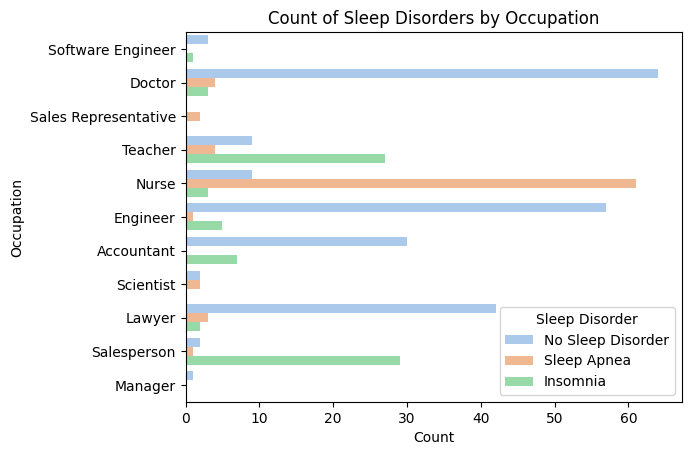

In [410]:
# Countplot 
sns.countplot(data=df, y='Occupation', hue='Sleep Disorder', palette='pastel')

# Set plot title and labels
plt.title('Count of Sleep Disorders by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')

# Show the plot
plt.show()


#### This plot shows that nurses have the highest chance to suffer from sleep disorder which is Sleep Apnea, while sales person and teachers also have a higher chance to suffer from Insomnia compared to other occupations to have any form of sleep disorder.

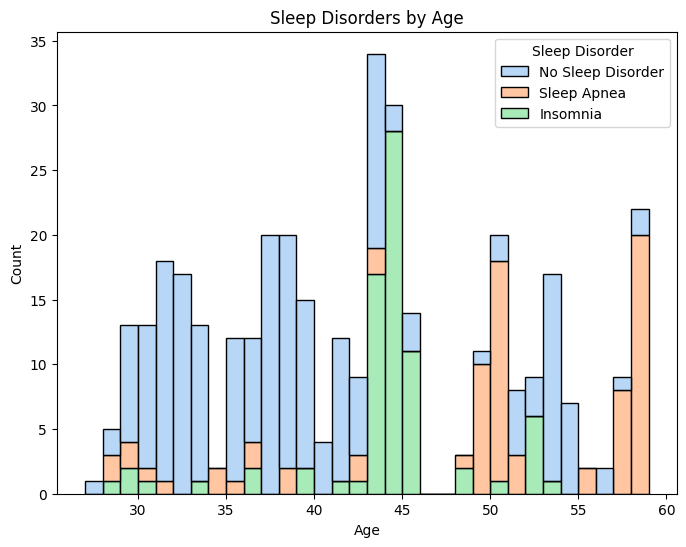

In [411]:
# Create subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram for 'Age' with multiple stacks based on 'Sleep Disorder'
sns.histplot(data=df, x='Age', bins=32, ax=ax, hue='Sleep Disorder', multiple="stack", palette='pastel')

# Set title and labels
ax.set_title('Sleep Disorders by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Show the plot
plt.show()


#### Most people from Age 40 to 50 have insomnia, while those over 50 tend to have sleep apnea.

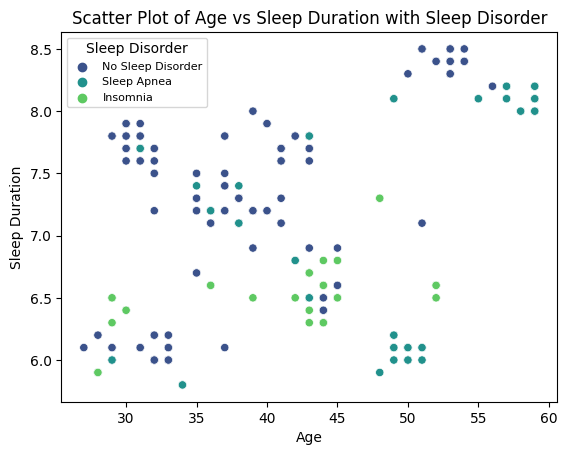

In [412]:
# Create a scatter plot
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Sleep Disorder', palette='viridis')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Scatter Plot of Age vs Sleep Duration with Sleep Disorder')

# Show the legend
plt.legend(title='Sleep Disorder', loc='upper left', fontsize='8')

# Show the plot
plt.show()


#### Here we can easily point out that people having 7+ hours of sleep have less chances of getting sleep disorders.

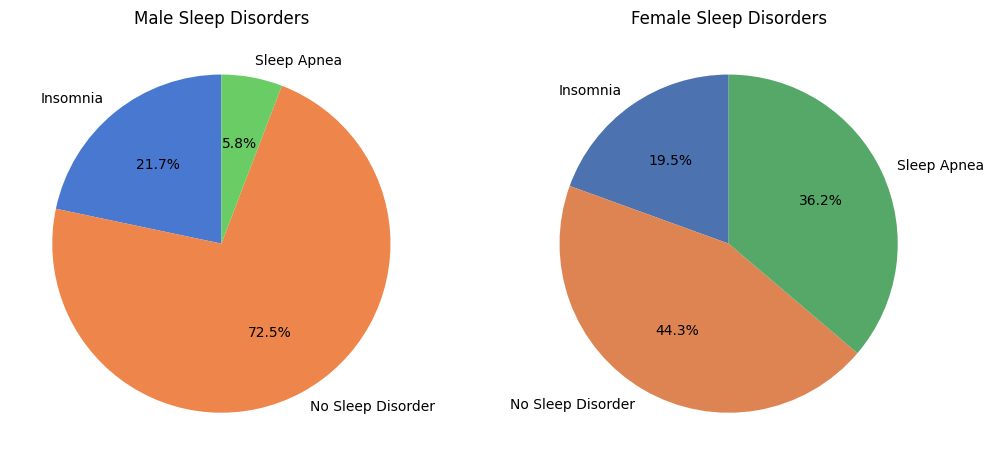

In [413]:
# Count the occurrences of each sleep disorder for each gender
sleep_disorder_counts = df.groupby(['Gender', 'Sleep Disorder']).size().unstack()

# Plot a pie chart for each gender with a different color scheme
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Male
axes[0].pie(sleep_disorder_counts.loc['Male'], labels=sleep_disorder_counts.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[0].set_title('Male Sleep Disorders')

# Plot for Female 
axes[1].pie(sleep_disorder_counts.loc['Female'], labels=sleep_disorder_counts.columns, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
axes[1].set_title('Female Sleep Disorders')

plt.show()


#### As we can see females much more often suffer from sleep disorder. 55.7% of females have Sleep Disorder, while only 27.5% of males have Sleep Disorder.

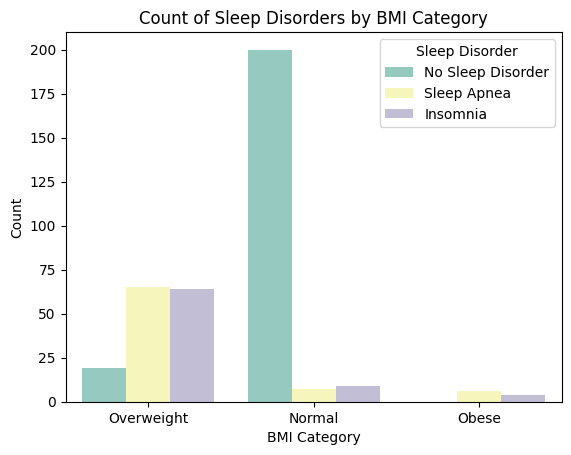

In [414]:
# Countplot 
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='Set3')

# Set plot title and labels
plt.title('Count of Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')

# Show the plot
plt.show()


#### One of the most clear correlation is that people in Overweight category have sleep disorders but some have none. Whereas, obese people atleast have either sleep apnea or Insomnia.

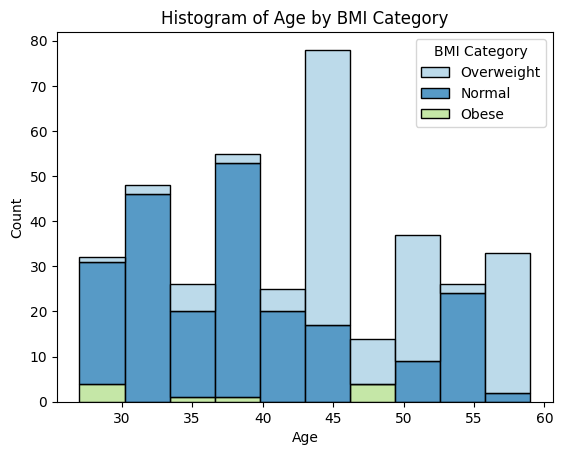

In [415]:
# Histogram for age by BMI category
sns.histplot(df, x='Age', hue='BMI Category', multiple="stack", palette='Paired')

# Set title and labels
plt.title('Histogram of Age by BMI Category')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


#### Overweight increases from age 45

In [416]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [417]:
# 0 = normal blood pressure
# 1 = abnormal blood pressure
df['Blood Pressure']=df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)

In [418]:
# Change number of predicted classes to 0 and 1 only, i. e Insomnia and Sleep Apnea 1 and 0 as No sleep disorder
df['Sleep Disorder']=df['Sleep Disorder'].apply(lambda x:1 if x in ['Insomnia','Sleep Apnea'] else 0)

In [419]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,0,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,0,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,0,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,1,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,1,85,3000,1
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,1,85,3000,1
6,7,Male,29,Teacher,6.3,6,40,7,Obese,1,82,3500,1
7,8,Male,29,Doctor,7.8,7,75,6,Normal,0,70,8000,0
8,9,Male,29,Doctor,7.8,7,75,6,Normal,0,70,8000,0
9,10,Male,29,Doctor,7.8,7,75,6,Normal,0,70,8000,0


#### We will encode the categorical variables

In [420]:
# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()

In [421]:
# Encode 'Occupation' column and replace the original values
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

# Encode 'Gender' column and replace the original values
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'BMI Category' column and replace the original values
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])


In [422]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,0,77,4200,0
1,2,1,28,1,6.2,6,60,8,0,0,75,10000,0
2,3,1,28,1,6.2,6,60,8,0,0,75,10000,0
3,4,1,28,6,5.9,4,30,8,1,1,85,3000,1
4,5,1,28,6,5.9,4,30,8,1,1,85,3000,1
5,6,1,28,9,5.9,4,30,8,1,1,85,3000,1
6,7,1,29,10,6.3,6,40,7,1,1,82,3500,1
7,8,1,29,1,7.8,7,75,6,0,0,70,8000,0
8,9,1,29,1,7.8,7,75,6,0,0,70,8000,0
9,10,1,29,1,7.8,7,75,6,0,0,70,8000,0


In [423]:
# Dropping Person ID as it has no significance for our analysis
df.drop(['Person ID'], axis=1, inplace=True)
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,2,0,77,4200,0
1,1,28,1,6.2,6,60,8,0,0,75,10000,0
2,1,28,1,6.2,6,60,8,0,0,75,10000,0
3,1,28,6,5.9,4,30,8,1,1,85,3000,1
4,1,28,6,5.9,4,30,8,1,1,85,3000,1
5,1,28,9,5.9,4,30,8,1,1,85,3000,1
6,1,29,10,6.3,6,40,7,1,1,82,3500,1
7,1,29,1,7.8,7,75,6,0,0,70,8000,0
8,1,29,1,7.8,7,75,6,0,0,70,8000,0
9,1,29,1,7.8,7,75,6,0,0,70,8000,0


In [424]:
df.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.339945,-0.088565,0.217105,-0.014509,-0.285824
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.523881,0.444364,-0.225606,0.057973,0.432007
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.694390,0.494905,0.043928,-0.105877,0.580162
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.377637,-0.185587,-0.516455,-0.039533,-0.338622
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.303876,-0.105235,-0.659865,0.016791,-0.310984
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.075508,0.372673,0.136971,0.772723,0.069787
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163665,0.085874,0.670026,0.186829,0.181685
BMI Category,-0.339945,0.523881,0.694390,-0.377637,-0.303876,0.075508,0.163665,1.000000,0.601946,0.248550,0.015949,0.790278
Blood Pressure,-0.088565,0.444364,0.494905,-0.185587,-0.105235,0.372673,0.085874,0.601946,1.000000,0.258466,0.222603,0.623608
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.248550,0.258466,1.000000,-0.030309,0.330254


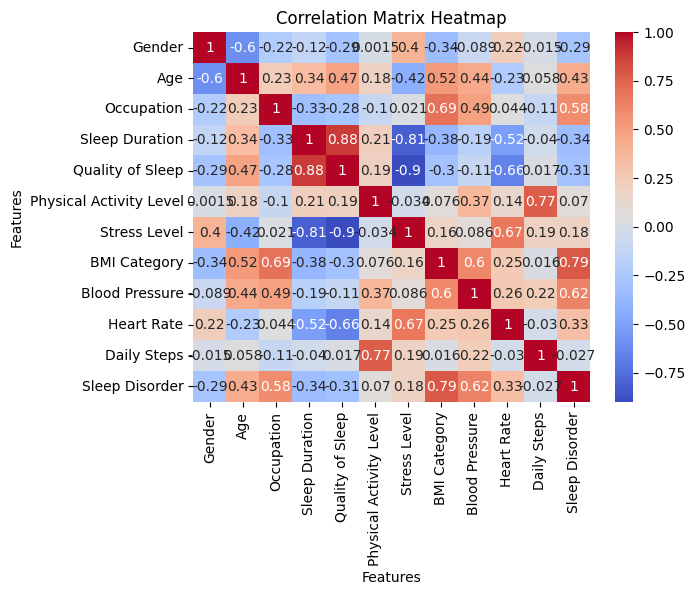

In [425]:
# Heatmap of the correlation matrix
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

# Set title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Train and Test Split

In [426]:
# Extract features (X) by dropping the 'Sleep Disorder' column
X = df.drop('Sleep Disorder', axis=1)

# Convert the features to NumPy array
X = X.values

# Extract the target variable (y)
y = df['Sleep Disorder']


In [427]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (X) to have zero mean and unit variance
X = scaler.fit_transform(X)

In [428]:
# Split the data into training and testing sets
# X_train: Features for training, X_test: Features for testing
# y_train: Target variable for training, y_test: Target variable for testing
# test_size: Percentage of data to be used for testing (in this case, 30%)
# random_state: Seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [429]:
X.shape

(374, 11)

In [430]:
y.shape

(374,)

## Model Development

#### Logistic Regression

In [431]:
# Create and train a Logistic Regression model
logistic_model = LogisticRegression(random_state=2)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_logistic = logistic_model.predict(X_test)

# Calculate and print metrics
classification_rep_logistic = classification_report(y_test, y_test_prediction_logistic)

# Accuracy on training data
X_train_prediction_logistic = logistic_model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, y_train)
print(f"Accuracy on Training data (Logistic Regression): {training_data_accuracy_logistic*100:.2f}%")

# Accuracy on test data
test_data_accuracy_logistic = accuracy_score(y_test_prediction_logistic, y_test)
print(f"Accuracy on Test data (Logistic Regression): {test_data_accuracy_logistic*100:.2f}%")

# Confusion matrix for Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, y_test_prediction_logistic)
print("Confusion matrix (Logistic Regression)")
print(logistic_conf_matrix)

# Show the plot
plt.show()

Accuracy on Training data (Logistic Regression): 93.10%
Accuracy on Test data (Logistic Regression): 92.04%
Confusion matrix (Logistic Regression)
[[62  4]
 [ 5 42]]


#### Random Forest

In [432]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=7, min_samples_leaf=2, max_features="sqrt", random_state=2)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_rf = rf_model.predict(X_test)

# Calculate and print metrics
classification_rep_rf = classification_report(y_test, y_test_prediction_rf)

# Accuracy on training data
X_train_prediction_rf = rf_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
print(f"Accuracy on Training data (Random Forest): {training_data_accuracy_rf*100:.2f}%")

# Accuracy on test data
test_data_accuracy_rf = accuracy_score(y_test_prediction_rf, y_test)
print(f"Accuracy on Test data (Random Forest): {test_data_accuracy_rf*100:.2f}%")

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_test_prediction_rf)
print("Confusion matrix (Random Forest)")
print(rf_conf_matrix)

# Show the plot
plt.show()

Accuracy on Training data (Random Forest): 93.87%
Accuracy on Test data (Random Forest): 92.92%
Confusion matrix (Random Forest)
[[63  3]
 [ 5 42]]


#### Extreme Gradient Booster

In [433]:
# Create and train an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, min_child_weight=2, subsample=1, colsample_bytree=1, random_state=2)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_xgb = xgb_model.predict(X_test)

# Calculate and print metrics
classification_rep_xgb = classification_report(y_test, y_test_prediction_xgb)

# Accuracy on training data
X_train_prediction_xgb = xgb_model.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, y_train)
print(f"Accuracy on Training data (XGBoost): {training_data_accuracy_xgb*100:.2f}%")

# Accuracy on test data
test_data_accuracy_xgb = accuracy_score(y_test_prediction_xgb, y_test)
print(f"Accuracy on Test data (XGBoost): {test_data_accuracy_xgb*100:.2f}%")

# Confusion matrix for XGBoost
xgb_conf_matrix = confusion_matrix(y_test, y_test_prediction_xgb)
print("Confusion matrix (XGBoost)")
print(xgb_conf_matrix)

# Show the plot
plt.show()


Accuracy on Training data (XGBoost): 94.25%
Accuracy on Test data (XGBoost): 91.15%
Confusion matrix (XGBoost)
[[61  5]
 [ 5 42]]


#### Support Vector Machine

In [434]:
# Create and train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=2)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_svm = svm_model.predict(X_test)

# Calculate and print metrics
classification_rep_svm = classification_report(y_test, y_test_prediction_svm)

# Accuracy on training data
X_train_prediction_svm = svm_model.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, y_train)
print(f"Accuracy on Training data (SVM): {training_data_accuracy_svm*100:.2f}%")

# Accuracy on test data
test_data_accuracy_svm = accuracy_score(y_test_prediction_svm, y_test)
print(f"Accuracy on Test data (SVM): {test_data_accuracy_svm*100:.2f}%")

# Confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, y_test_prediction_svm)
print("Confusion matrix (SVM)")
print(svm_conf_matrix)

# Show the plot
plt.show()


Accuracy on Training data (SVM): 93.87%
Accuracy on Test data (SVM): 92.04%
Confusion matrix (SVM)
[[62  4]
 [ 5 42]]


#### Naive Bayes

In [435]:
# Create and train a Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_gnb = gnb_model.predict(X_test)

# Calculate and print metrics
classification_rep_gnb = classification_report(y_test, y_test_prediction_gnb)

# Accuracy on training data
X_train_prediction_gnb = gnb_model.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction_gnb, y_train)
print(f"Accuracy on Training data (Gaussian Naive Bayes): {training_data_accuracy_gnb*100:.2f}%")

# Accuracy on test data
test_data_accuracy_gnb = accuracy_score(y_test_prediction_gnb, y_test)
print(f"Accuracy on Test data (Gaussian Naive Bayes): {test_data_accuracy_gnb*100:.2f}%")

# Confusion matrix for Gaussian Naive Bayes
gnb_conf_matrix = confusion_matrix(y_test, y_test_prediction_gnb)
print("Confusion matrix (Gaussian Naive Bayes)")
print(gnb_conf_matrix)

# Show the plot
plt.show()


Accuracy on Training data (Gaussian Naive Bayes): 93.49%
Accuracy on Test data (Gaussian Naive Bayes): 92.92%
Confusion matrix (Gaussian Naive Bayes)
[[63  3]
 [ 5 42]]


#### KNN

In [436]:
# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_prediction_knn = knn_model.predict(X_test)

# Calculate and print metrics
classification_rep_knn = classification_report(y_test, y_test_prediction_knn)

# Accuracy on training data
X_train_prediction_knn = knn_model.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)
print(f"Accuracy on Training data (KNN): {training_data_accuracy_knn*100:.2f}%")

# Accuracy on test data
test_data_accuracy_knn = accuracy_score(y_test_prediction_knn, y_test)
print(f"Accuracy on Test data (KNN): {test_data_accuracy_knn*100:.2f}%")

# Confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, y_test_prediction_knn)
print("Confusion matrix (KNN)")
print(knn_conf_matrix)

# Show the plot
plt.show()


Accuracy on Training data (KNN): 92.72%
Accuracy on Test data (KNN): 91.15%
Confusion matrix (KNN)
[[61  5]
 [ 5 42]]


#### Comparison of Test Accuracy of all the models

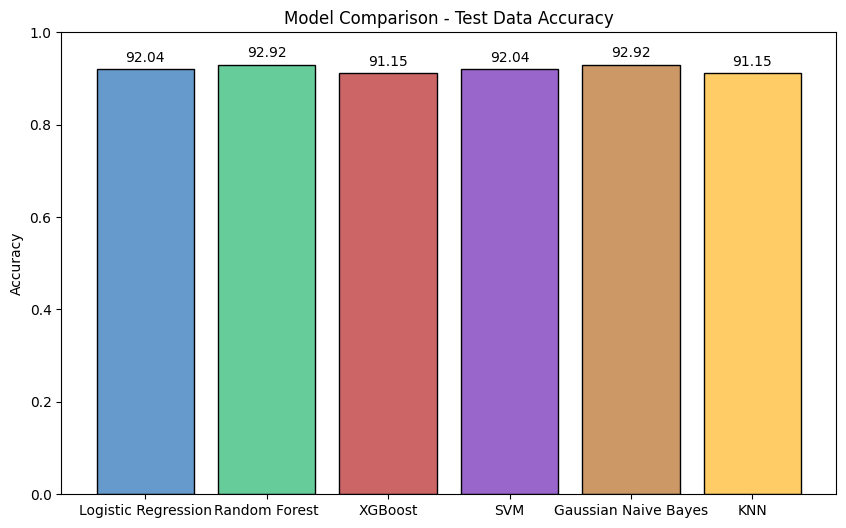

In [437]:
# List of model names
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Gaussian Naive Bayes', 'KNN']

# List of accuracies for each model
accuracies = [
    test_data_accuracy_logistic,
    test_data_accuracy_rf,
    test_data_accuracy_xgb,
    test_data_accuracy_svm,
    test_data_accuracy_gnb,
    test_data_accuracy_knn
]

# Plotting the bar plot with borders, edges, and accuracy labels
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#6699cc', '#66cc99', '#cc6666', '#9966cc', '#cc9966', '#ffcc66']

# Plotting the bar plot with the classy color tone
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')

# Adding borders and edges
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval*100, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Data Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit to ensure accurate representation of accuracy values
plt.show()
